<a href="https://colab.research.google.com/github/ssweta3seal/HotelBookingAnalysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive                                                                                                                                                                                                                                                                                                                                                                                                                                                                
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

import matplotlib.ticker as mtick

pd.options.display.max_columns = None

LOADING THE DATASET AND READING THE DATA

In [ ]:
#working_dir_path=('/content/drive/MyDrive/Colab Notebooks/Copy of Copy of Hotel Booking Analysis - Capstone Project.ipynb')

In [ ]:
hotel_data=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/EDA Capstone project/Hotel Booking Analysis/Hotel Bookings.csv')

In [ ]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_data.shape

(119390, 32)

In [ ]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

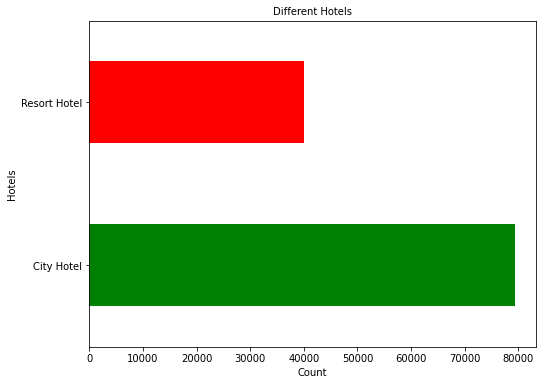

In [ ]:
#checking diferent types of hotel
plt.figure(figsize=[8,6])

hotel_data.groupby('hotel')['hotel'].count().plot.barh(color=['Green','Red'])

plt.title('Different Hotels', fontsize=10)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Hotels', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
#checking total null values
hotel_data.isnull().sum().sort_values()

hotel                                  0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
reservation_status                     0
distribution_channel                   0
reservation_status_date                0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
market_segment                         0
is_canceled                            0
arrival_date_wee

As we see that almost --% of column company is Null so we can drop it.

Where as for children oly 4 data is missing so it is replced with 0 assuming as they hve no child so no information hs been provided.



In [ ]:
#dropping column with null values more than 90%
hotel_data=hotel_data.drop(['company'], axis = 1)

In [ ]:
#imputing null values in chidren column
hotel_data['children'] = hotel_data['children'].fillna(0)

In [ ]:
#number of unique country
country = hotel_data['country'].unique().tolist()
len(country)

178

In [ ]:
#number of unique agent
agent = hotel_data['agent'].unique().tolist()
len(agent)

334

In [ ]:
hotel_data.value_counts(['hotel','hotel'])

hotel         hotel       
City Hotel    City Hotel      79330
Resort Hotel  Resort Hotel    40060
dtype: int64

In [ ]:
#comparing cancelation percentage
cancelled = hotel_data['is_canceled'].sum() 
#cancelled
#a=hotel_data.counts['is_canceled']

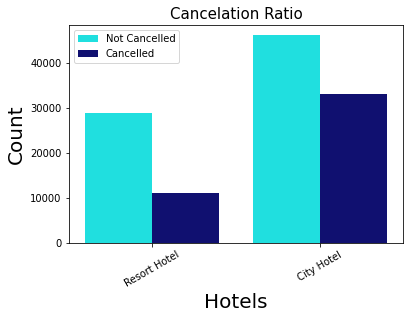

In [ ]:
#need the code for stackbar

sns.countplot(x='hotel', hue='is_canceled', data=hotel_data, palette=['cyan','navy'])

plt.xticks(rotation=30)
plt.title('Cancelation Ratio', fontsize=15)
plt.xlabel('Hotels', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(['Not Cancelled', 'Cancelled'])

Text(0, 0.5, 'Count')

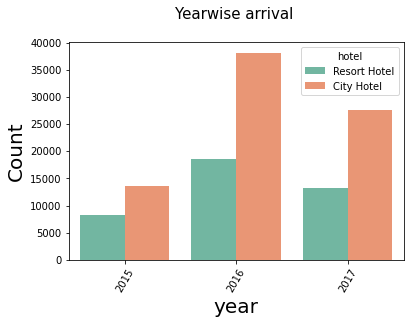

In [ ]:
sns.countplot(x='arrival_date_year', hue='hotel', data=hotel_data, palette='Set2')
plt.xticks(rotation=60)
plt.title('Yearwise arrival \n', fontsize=15)
plt.xlabel('year', fontsize=20)
plt.ylabel('Count', fontsize=20)


In [ ]:
df_not_canceled = hotel_data[hotel_data['is_canceled'] == 0]

In [ ]:

hotel_data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:


df = hotel_data['country'].value_counts()
df

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

Text(0.5, 1.0, 'Booked Hotel type by country')

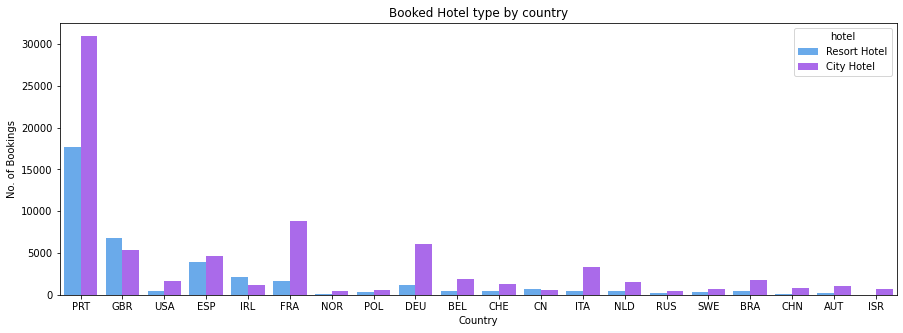

In [ ]:


d = hotel_data['country'].value_counts().sort_values(ascending=False)[:20]
plt.figure(figsize=(15,5))
sns.countplot(x='country', hue='hotel', data=hotel_data[hotel_data['country'].isin(d.index)],palette='cool')
plt.xlabel("Country")
plt.ylabel("No. of Bookings")
plt.title("Booked Hotel type by country")

Text(0.5, 1.0, 'Daily Rate by hotel type')

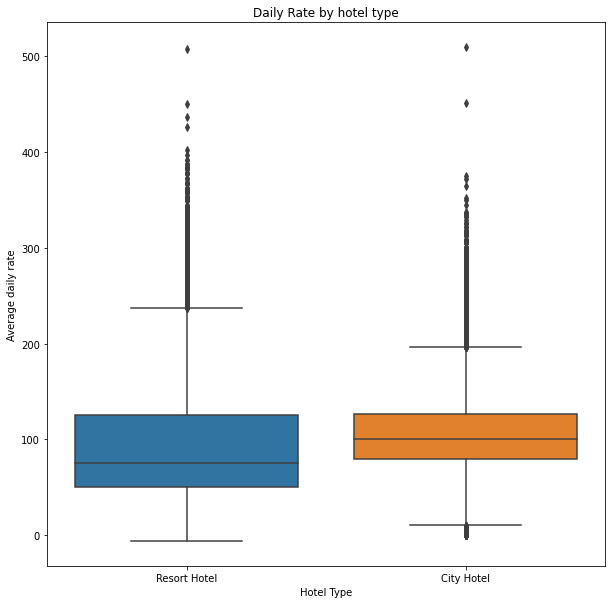

In [ ]:
plt.figure(figsize=(10,10))
df2 = hotel_data.drop(hotel_data[hotel_data['adr']==5400].index, axis=0, inplace=False)  # Removed an extreme outlier (adr=5400) that made boxplot very squeezed to view
sns.boxplot(x='hotel', y='adr', data = df2)
plt.ylabel('Average daily rate')
plt.xlabel("Hotel Type")
plt.title("Daily Rate by hotel type")

Text(0.5, 1.0, 'Daily rate by hotel type')

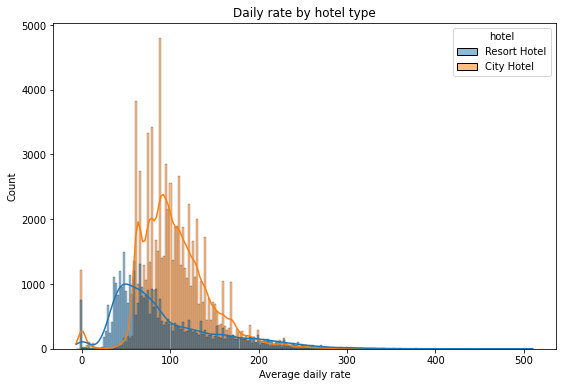

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(x='adr', hue='hotel', data=df2, kde=True)
plt.xlabel("Average daily rate")
plt.title("Daily rate by hotel type")

In [ ]:
b

In [ ]:
plt.figure(figsize=(9,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=d)
plt.ylabel("Average daily price")
plt.xlabel("Months")
p = plt.xticks(rotation=30)
plt.title("Average Daily rate by months")

In [ ]:
#daily rate by customer type

plt.figure(figsize=(9,6))
sns.boxplot(x='customer_type', y='adr', hue='hotel', data=df2 )
plt.ylabel("Daily Price")
plt.xlabel("Customer Type")
plt.title("Daily rate by customer type")

In [ ]:
## Select single, couple, multiple adults and family-- resolve this plot issue SAI pls
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

BOOKINGS BY MARKET SEG

Text(0.5, 1.0, 'Bookings by market segment')

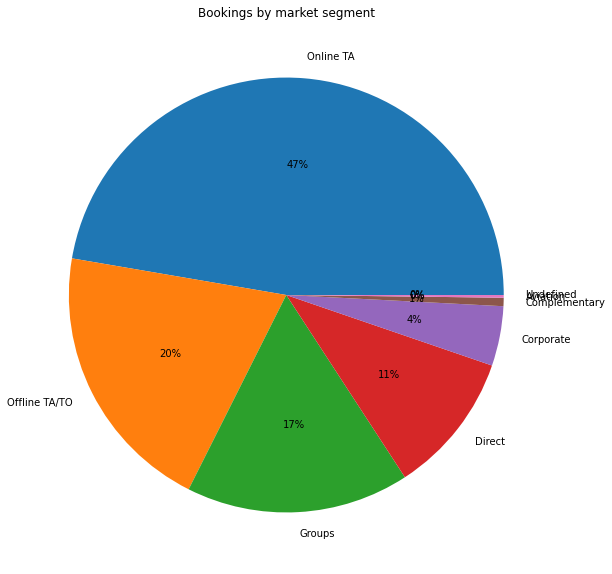

In [ ]:
d = hotel_data['market_segment'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by market segment")

Almost half of bookings was done through Online Travel Agents (TA). More than 90% bookings was done by Online TA, Offline TA/TO, Groups & Direct

Text(0.5, 1.0, 'Bookings by distribution channel')

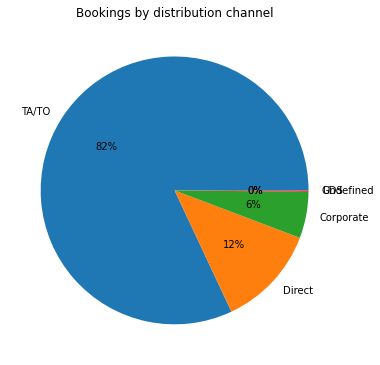

In [ ]:

#booking by distribution channel
d = hotel_data['distribution_channel'].value_counts()
plt.figure(figsize=(6,8))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by distribution channel")

Text(0.5, 1.0, 'Bookings by distribution channel')

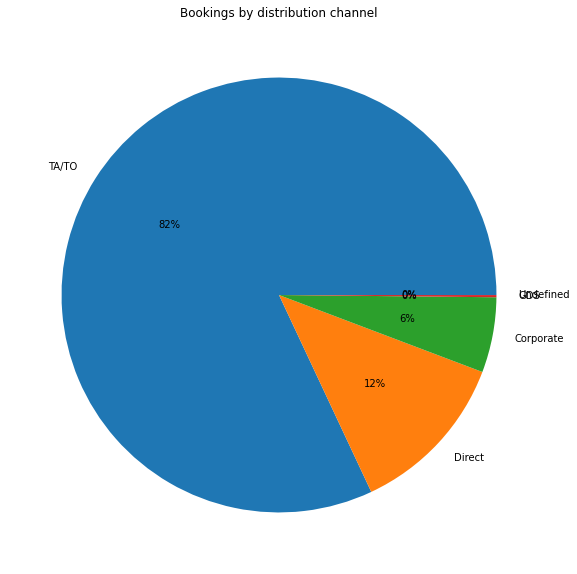

In [ ]:
#booking with meals
d = hotel_data['distribution_channel'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by distribution channel")

Almost 90% of total guests books meal in their bookings, among which majority books meal of type BB.

Text(0.5, 1.0, 'Average number of special requests by customer type')

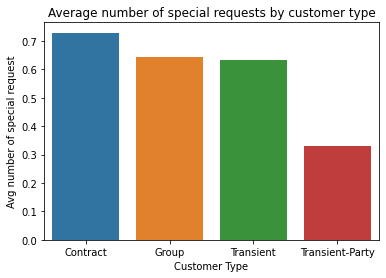

In [ ]:

spclreq = hotel_data.groupby("customer_type")['total_of_special_requests'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=spclreq.index, y=spclreq)
p = plt.xticks()
plt.xlabel("Customer Type")
plt.ylabel("Avg number of special request")
plt.title("Average number of special requests by customer type")

Text(0.5, 1.0, 'Hotel Preference by customer type')

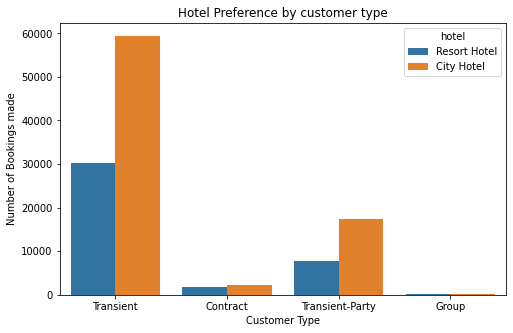

In [ ]:
#hotel prefrence by customer type

plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', hue='hotel', data=hotel_data)
plt.xlabel("Customer Type")
plt.ylabel("Number of Bookings made")
plt.title("Hotel Preference by customer type")

Taking cancelation as another variable

In [ ]:
#impact of lead time on cancelation
lead_df = hotel_data.groupby('lead_time').agg({'is_canceled':'sum', 'hotel':'count'}).reset_index().rename(columns={'is_canceled':'cancelled_bookings', 'hotel':'total_bookings'})

lead_df['cancellation_percentage'] = (lead_df['cancelled_bookings']/lead_df['total_bookings'])*100
lead_df.head()

,lead_time,cancelled_bookings,total_bookings,cancellation_percentage
0,0,430,6345,6.776990
1,1,321,3460,9.277457
2,2,213,2069,10.294828
3,3,182,1816,10.022026
4,4,176,1715,10.262391


Text(0.5, 1.0, 'Effect of Lead time on Cancellations')

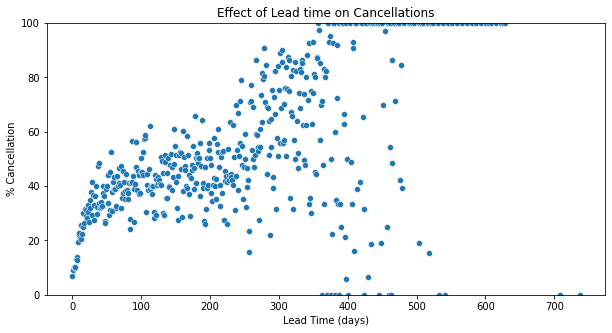

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='lead_time', y='cancellation_percentage', data=lead_df)
plt.ylim((0,100))
plt.xlabel("Lead Time (days)")
plt.ylabel("% Cancellation")
plt.title("Effect of Lead time on Cancellations")

Text(0.5, 1.0, 'Cancellations by repeated guests')

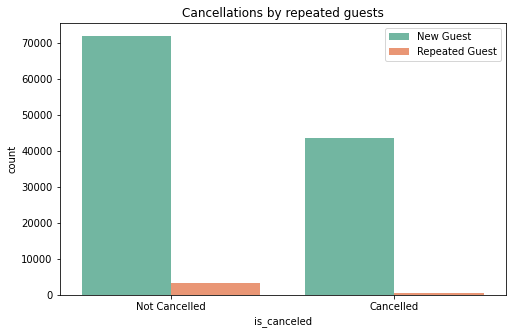

In [ ]:
#cancelation ny repeated guests
plt.figure(figsize=(8,5))
sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = hotel_data, palette='Set2')
plt.legend(['New Guest', 'Repeated Guest'])
plt.xticks(ticks=[0,1], labels=['Not Cancelled', 'Cancelled'])
plt.title("Cancellations by repeated guests")

Text(0.5, 1.0, 'Cancellation by Market Segments')

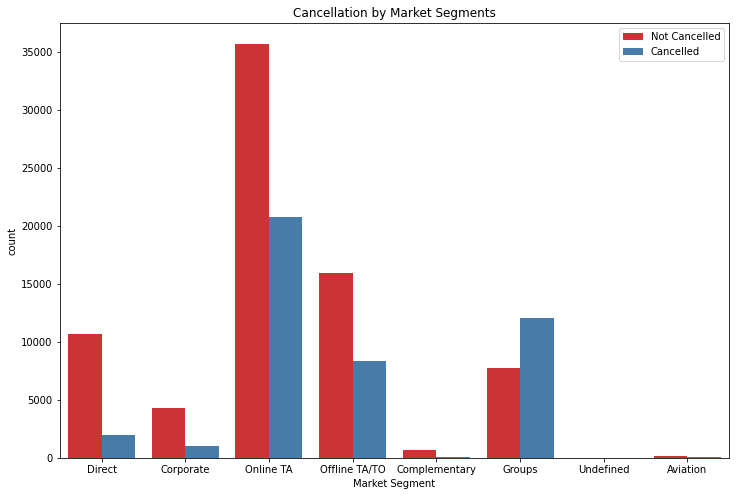

In [ ]:

#cancelation by  market segment

plt.figure(figsize = (12,8))
sns.countplot(x = "market_segment", hue = 'is_canceled', data = hotel_data,palette='Set1')
plt.xlabel("Market Segment")
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title("Cancellation by Market Segments")



** Room Types **

In [ ]:
rooms=sorted(hotel_data['reserved_room_type'].unique())

Text(0.5, 1.0, 'Types of Rooms reserved')

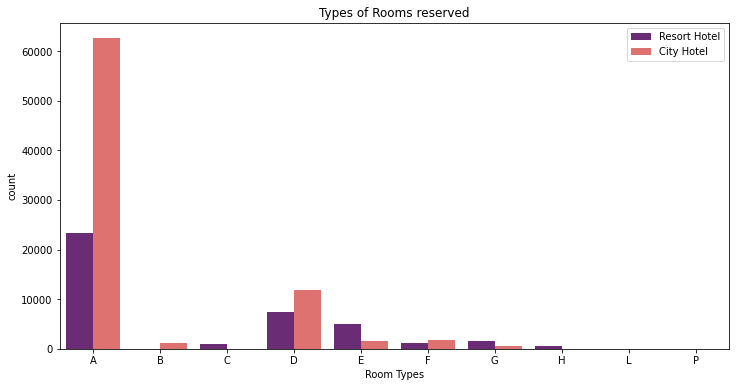

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='reserved_room_type', hue='hotel', data=hotel_data, order=rooms,palette='magma')
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Types of Rooms reserved")

Text(0.5, 1.0, 'Types of Rooms assigned')

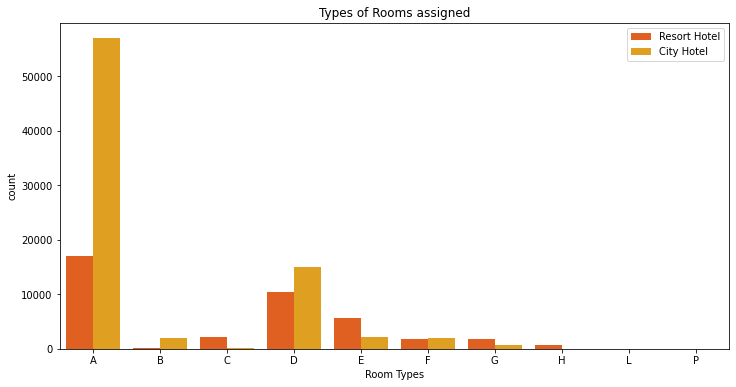

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='assigned_room_type', hue='hotel', data=hotel_data, order=rooms,palette='autumn')
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Types of Rooms assigned")

Text(0.5, 1.0, 'Most Denied Room Types')

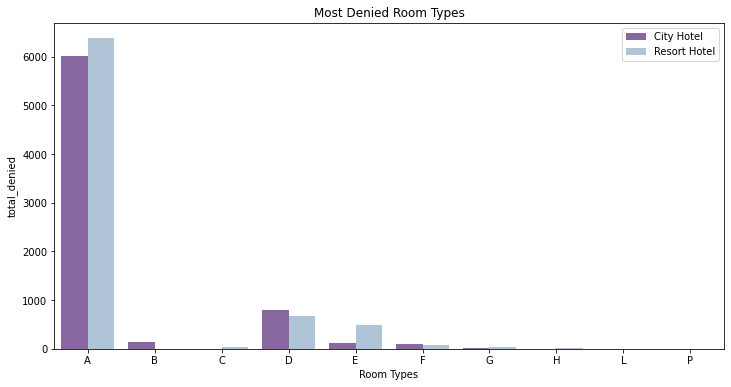

In [ ]:
#Most Denied Room Types
d = hotel_data.loc[hotel_data['reserved_room_type'] != hotel_data['assigned_room_type']].groupby(['reserved_room_type','hotel'])['meal'].count().reset_index().rename(columns={'meal':'total_denied'})

plt.figure(figsize = (12,6))
sns.barplot(x='reserved_room_type', y='total_denied', hue='hotel', data=d, order=rooms,palette='BuPu_r')
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Most Denied Room Types")

In [ ]:

d = hotel_data.loc[hotel_data['reserved_room_type'] != hotel_data['assigned_room_type']].groupby(['reserved_room_type','hotel'])['meal'].count().reset_index().rename(columns={'meal':'total_denied'})


In [ ]:
d

,reserved_room_type,hotel,total_denied
0,A,City Hotel,6014
1,A,Resort Hotel,6382
2,B,City Hotel,130
3,C,City Hotel,3
4,C,Resort Hotel,46
5,D,City Hotel,792
6,D,Resort Hotel,673
7,E,City Hotel,123
8,E,Resort Hotel,489
9,F,City Hotel,108


In [ ]:
hotel_data_Notcanceled = hotel_data[hotel_data['is_canceled'] == 0]

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data=hotel_data_Notcanceled,x='stays_in_weekend_nights',hue='hotel')

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data=hotel_data_Notcanceled,x='stays_in_week_nights',hue='hotel')